# Tabular Prototype

By Monday 6/30, make an attempt at formulating and "solving" your proposed problem.

## Machine Learning


### Problem Formulation

* Remove unneed columns, for example:
    * duplicated
    * categorical features that were turned into one-hot.
    * features that identify specific rows, like ID number.
    * make sure your target is properly encoded also.
* Split training sample into train, validation, and test sub-samples.

### Train ML Algorithm

* You only need one algorithm for now. You can do more if you like.
* For now, focus on making it work, rather than best result.
* Try to get a non-trivial result.

### Evaluate Performance on Validation Sample

* Compute the usual metric for your ML task.
* Compute the score for the kaggle challenge.



In [1]:
#From the previous notebook

from preprocessing import load_and_preprocess
X_scaled, y = load_and_preprocess('cleaned_student_data.csv')


### Problem Formulation
Data Cleaning & Preparation(Already solved in the previous notebook: Feasibility)

* Missing values? — None (Missing: 0)
* Duplicates? — None (Duplicates: 0)
* Scaling? — Numerical features scaled with StandardScaler
* Features cleaned? — Dropped StudentID and any unimportant columns
* Target prepared? — GradeClass is an integer label (0–4)
* Features numeric? — Yes — all numeric, perfect for scikit-learn
* Feature/target shapes? — X_scaled.shape: (2392, 13) and y.shape: (2392,)


### Train ML Algorithm

In [2]:
from sklearn.model_selection import train_test_split

# 80/20 split into train/val and test
X_trainval, X_test, y_trainval, y_test = train_test_split(
    X_scaled, y, test_size=0.2, stratify=y, random_state=42
)

# Split train/val into 75/25
X_train, X_val, y_train, y_val = train_test_split(
    X_trainval, y_trainval, test_size=0.25, stratify=y_trainval, random_state=42
)

print('Train:', X_train.shape, 'Val:', X_val.shape, 'Test:', X_test.shape)


Train: (1434, 13) Val: (479, 13) Test: (479, 13)


### Evaluate Performance on Validation Sample

In [3]:
# First Try
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

# Fit a RandomForest baseline
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Metrics
acc = accuracy_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred, average='weighted')
cm = confusion_matrix(y_val, y_val_pred)

print('Validation Accuracy:', acc)
print('Validation F1-score:', f1)
print('\nConfusion Matrix:\n', cm)
print('\nClassification Report:\n', classification_report(y_val, y_val_pred))


Validation Accuracy: 0.906054279749478
Validation F1-score: 0.9036485031207436

Confusion Matrix:
 [[ 15   1   2   2   2]
 [  1  42   0   1  10]
 [  1   3  67   1   6]
 [  0   2   3  70   8]
 [  0   1   0   1 240]]

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.86      0.78      0.82        54
           2       0.93      0.86      0.89        78
           3       0.93      0.84      0.89        83
           4       0.90      0.99      0.94       242

    accuracy                           0.91       479
   macro avg       0.90      0.83      0.86       479
weighted avg       0.91      0.91      0.90       479



In [4]:
# Second Try
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Train the model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Compute metrics
acc = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred, average='weighted')
recall = recall_score(y_val, y_val_pred, average='weighted')
f1 = f1_score(y_val, y_val_pred, average='weighted')

# Print results
print(f'Validation Accuracy:  {acc:.3f}')
print(f'Validation Precision: {precision:.3f}')
print(f'Validation Recall:    {recall:.3f}')
print(f'Validation F1-score:  {f1:.3f}\n')

# Detailed report
print('Classification Report:\n')
print(classification_report(y_val, y_val_pred))


Validation Accuracy:  0.906
Validation Precision: 0.906
Validation Recall:    0.906
Validation F1-score:  0.904

Classification Report:

              precision    recall  f1-score   support

           0       0.88      0.68      0.77        22
           1       0.86      0.78      0.82        54
           2       0.93      0.86      0.89        78
           3       0.93      0.84      0.89        83
           4       0.90      0.99      0.94       242

    accuracy                           0.91       479
   macro avg       0.90      0.83      0.86       479
weighted avg       0.91      0.91      0.90       479



In [5]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute final metrics
print("🔍 Final Evaluation on Test Set:")
print("Accuracy: ", accuracy_score(y_test, y_test_pred))
print("Precision:", precision_score(y_test, y_test_pred, average='weighted'))
print("Recall:   ", recall_score(y_test, y_test_pred, average='weighted'))
print("F1 Score: ", f1_score(y_test, y_test_pred, average='weighted'))

# Full report
print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))


🔍 Final Evaluation on Test Set:
Accuracy:  0.9144050104384134
Precision: 0.9168888520318789
Recall:    0.9144050104384134
F1 Score:  0.908086831309554

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.33      0.50        21
           1       0.84      0.87      0.85        54
           2       0.90      0.95      0.93        78
           3       0.89      0.89      0.89        83
           4       0.94      0.97      0.96       243

    accuracy                           0.91       479
   macro avg       0.91      0.80      0.83       479
weighted avg       0.92      0.91      0.91       479



### Prototype Summary

We trained a Random Forest classifier on a cleaned student performance dataset.  
After splitting into train, validation, and test sets, we achieved the following results:

- **Validation Accuracy**: 90.6%
- **Test Accuracy**: 91.4%
- **Final Weighted F1 Score**: 90.8%

The model showed strong predictive performance, especially in identifying students at risk of failing (Grade F).  
This establishes a solid baseline for future improvements, such as hyperparameter tuning or trying different classifiers.


### **More Model Trainning**

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

# One-vs-Rest Logistic Regression
logreg_model = OneVsRestClassifier(
    LogisticRegression(max_iter=1000, random_state=42)
)

# Train
logreg_model.fit(X_train, y_train)

# Predict on validation set
y_val_logreg = logreg_model.predict(X_val)

# Metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

acc = accuracy_score(y_val, y_val_logreg)
precision = precision_score(y_val, y_val_logreg, average='weighted')
recall = recall_score(y_val, y_val_logreg, average='weighted')
f1 = f1_score(y_val, y_val_logreg, average='weighted')

print(f"Validation Accuracy (LogReg):  {acc:.3f}")
print(f"Validation Precision: {precision:.3f}")
print(f"Validation Recall:    {recall:.3f}")
print(f"Validation F1-score:  {f1:.3f}\n")

print('Classification Report:')
print(classification_report(y_val, y_val_logreg))


Validation Accuracy (LogReg):  0.674
Validation Precision: 0.605
Validation Recall:    0.674
Validation F1-score:  0.624

Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.44      0.35      0.39        54
           2       0.54      0.62      0.57        78
           3       0.43      0.19      0.27        83
           4       0.78      0.99      0.87       242

    accuracy                           0.67       479
   macro avg       0.44      0.43      0.42       479
weighted avg       0.60      0.67      0.62       479



In [9]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

# Initialize the model
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train on training data
gb_model.fit(X_train, y_train)

# Predict on validation set
y_val_gb = gb_model.predict(X_val)

# Evaluate metrics
acc = accuracy_score(y_val, y_val_gb)
precision = precision_score(y_val, y_val_gb, average='weighted')
recall = recall_score(y_val, y_val_gb, average='weighted')
f1 = f1_score(y_val, y_val_gb, average='weighted')

print(f"Validation Accuracy (GB):  {acc:.3f}")
print(f"Validation Precision: {precision:.3f}")
print(f"Validation Recall:    {recall:.3f}")
print(f"Validation F1-score:  {f1:.3f}\n")

print('Classification Report:')
print(classification_report(y_val, y_val_gb))


Validation Accuracy (GB):  0.910
Validation Precision: 0.911
Validation Recall:    0.910
Validation F1-score:  0.908

Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.73      0.78        22
           1       0.89      0.78      0.83        54
           2       0.94      0.86      0.90        78
           3       0.93      0.86      0.89        83
           4       0.90      0.99      0.94       242

    accuracy                           0.91       479
   macro avg       0.90      0.84      0.87       479
weighted avg       0.91      0.91      0.91       479



### **ROC Curves**

In [10]:
# probabilities for each class
rf_proba = model.predict_proba(X_val)
logreg_proba = logreg_model.predict_proba(X_val)
gb_proba = gb_model.predict_proba(X_val)


In [11]:
from sklearn.preprocessing import label_binarize

y_val_bin = label_binarize(y_val, classes=[0,1,2,3,4])


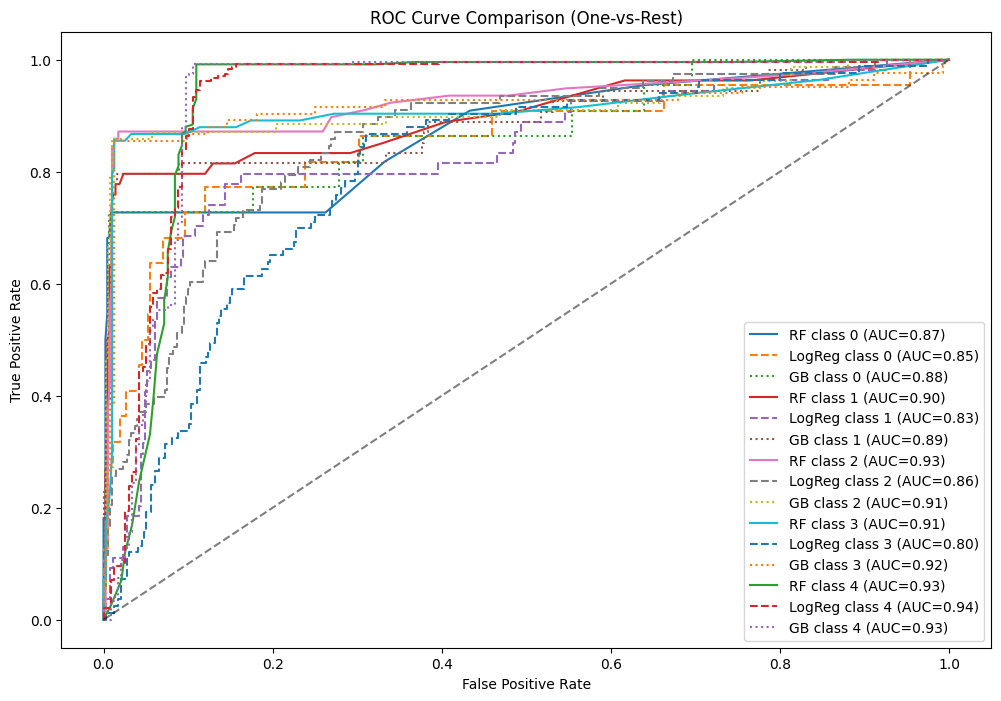

In [12]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

plt.figure(figsize=(12,8))

for i in range(len(logreg_model.classes_)):
    # Random Forest
    fpr_rf, tpr_rf, _ = roc_curve(y_val_bin[:,i], rf_proba[:,i])
    auc_rf = auc(fpr_rf, tpr_rf)

    # Logistic Regression
    fpr_lr, tpr_lr, _ = roc_curve(y_val_bin[:,i], logreg_proba[:,i])
    auc_lr = auc(fpr_lr, tpr_lr)

    # Gradient Boosting
    fpr_gb, tpr_gb, _ = roc_curve(y_val_bin[:,i], gb_proba[:,i])
    auc_gb = auc(fpr_gb, tpr_gb)

    plt.plot(fpr_rf, tpr_rf, label=f'RF class {i} (AUC={auc_rf:.2f})')
    plt.plot(fpr_lr, tpr_lr, linestyle='--', label=f'LogReg class {i} (AUC={auc_lr:.2f})')
    plt.plot(fpr_gb, tpr_gb, linestyle=':', label=f'GB class {i} (AUC={auc_gb:.2f})')

plt.plot([0,1],[0,1],'k--',alpha=0.5)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve Comparison (One-vs-Rest)")
plt.legend()
plt.show()


In [13]:
# store your results
results = {
    "Random Forest": {
        "Accuracy": 0.906,
        "Precision": 0.906,
        "Recall": 0.906,
        "F1": 0.904
    },
    "Logistic Regression": {
        "Accuracy": 0.674,
        "Precision": 0.605,
        "Recall": 0.674,
        "F1": 0.624
    },
    "Gradient Boosting": {
        "Accuracy": 0.910,
        "Precision": 0.911,
        "Recall": 0.910,
        "F1": 0.908
    }
}


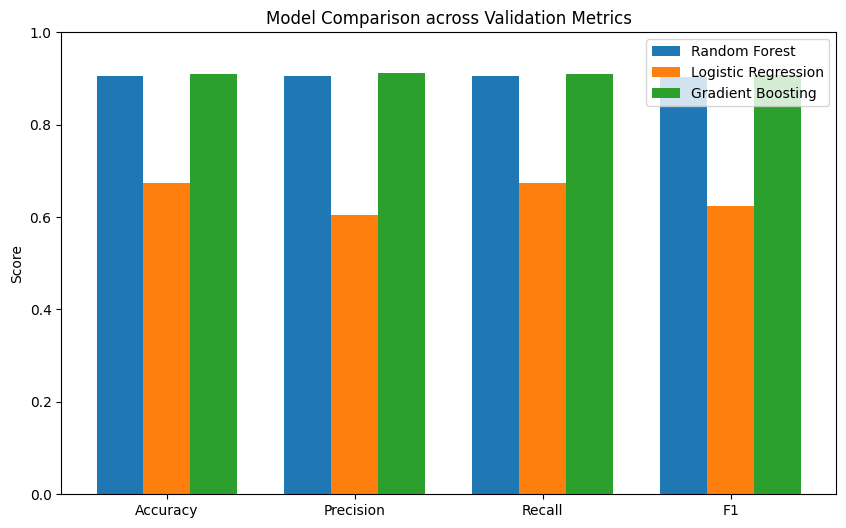

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# set up
models = list(results.keys())
metrics = ["Accuracy", "Precision", "Recall", "F1"]
metric_values = np.array([[results[m][metric] for metric in metrics] for m in models])

x = np.arange(len(metrics))
width = 0.25  # bar width

plt.figure(figsize=(10,6))

# bars for each model
for idx, model in enumerate(models):
    plt.bar(x + idx*width, metric_values[idx], width, label=model)

plt.xticks(x + width, metrics)
plt.ylabel("Score")
plt.ylim(0,1)
plt.title("Model Comparison across Validation Metrics")
plt.legend()
plt.show()
